# Build a Neural Netwrok for multi-classification of IRIS types

In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load our data
- We use Iris Species as the example dataset

- Read the dataset
- Shuffle the dataset

In [4]:
# read in the data

df = pd.read_csv('Iris.csv')

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

# shuffle the dataset to prevent the model from learning any patterns that might exist in the order of the data.! 
df = df.sample(frac=1).reset_index(drop=True)

# Prepare data for modeling
- Split the data(X,y)
- Convert to NumPy array
- Encode class values as integers


In [6]:
# split into X and Y

Y = df['Species']
X = df.drop(['Species'], axis=1)

print(X.shape)
print(Y.shape)

# convert X to numpy arrays


X = np.array(X)

(150, 5)
(150,)


In [24]:
# show Y
Y.head()

## 0        setosa
## 1     virginica
## 2    versicolor
## 3     virginica
## 4        setosa

# work with labels
# encode class values as integers
label = LabelEncoder()
print(label)


label.fit(Y)
label_Y = label.transform(Y)
print(label_Y)



# convert integers to dummy variables (i.e. one hot encoded) ; use to_categorical()

y_dummy = np_utils.to_categorical(label_Y)
print(y_dummy)




LabelEncoder()
[0 2 2 1 1 1 1 2 1 2 1 1 0 2 2 2 2 1 0 2 1 1 0 0 2 0 0 1 1 2 0 2 1 2 0 0 1
 1 2 2 1 0 0 2 1 0 2 0 1 0 0 2 0 2 1 1 1 1 2 0 0 0 2 1 2 0 2 0 1 0 2 2 0 0
 0 2 1 2 2 1 1 1 0 1 1 1 1 1 2 0 1 0 2 2 0 0 0 2 1 2 1 1 2 2 2 1 0 0 1 1 1
 1 1 1 0 0 0 2 2 0 1 0 0 2 1 0 0 1 2 0 2 1 2 0 0 0 2 2 2 0 0 0 2 0 2 1 2 2
 1 2]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

# Build, Compile, Fit model
- Use the Sequential API to build your model
- Specify an optimizer (rmsprop or Adam)
- Set a loss function (categorical_crossentropy)
- EarlyStopping callbacks to prevent overfitting (patience of 10)
- Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)

In [25]:
# build a model with 1 or 2 layers and get summary of the model

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model for multi-class classification


model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                96        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [11]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
# now we just update our model fit call with 80/20 split
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)






history = model.fit(X,
                    y_dummy,
                    callbacks=[early_stopping_callback],
                    epochs=800000,
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)



Epoch 1/800000
12/12 [==============================] - 0s 14ms/step - loss: 0.0778 - accuracy: 0.9917 - val_loss: 0.1410 - val_accuracy: 0.9333
Epoch 2/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.0734 - val_accuracy: 0.9667
Epoch 3/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0670 - accuracy: 0.9917 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 4/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0729 - accuracy: 0.9750 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 5/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0669 - accuracy: 0.9917 - val_loss: 0.0685 - val_accuracy: 1.0000
Epoch 6/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0835 - accuracy: 0.9667 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 7/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy

12/12 [==============================] - 0s 7ms/step - loss: 0.0514 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 58/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 59/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 60/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9917 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 61/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 62/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 63/800000
12/12 [==============================] - 0s 8ms/step - loss: 0.0510 - accuracy: 0.9917 - val_loss: 0.0444 - val_accuracy: 1.0000
E

12/12 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 114/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 115/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 116/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9667
Epoch 117/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 118/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 119/800000
12/12 [==============================] - 0s 7ms/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 0.0280 - val_accuracy: 1.

# Evaluate the Model
- Learning curves (Loss)
- Learning curves (Accuracy)
- Confusion matrix

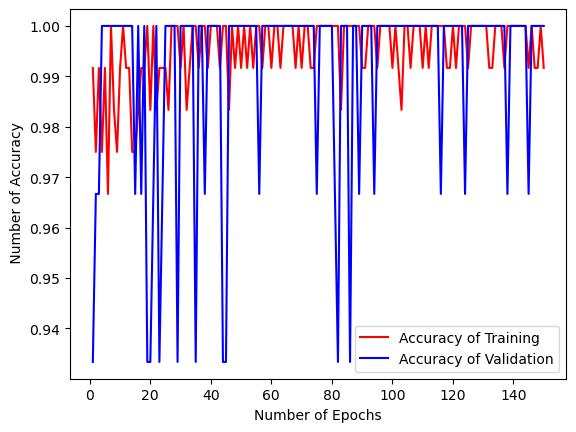

In [26]:

import matplotlib.pyplot as plt

history_directory = history



# learning curve
# accuracy
accuracy = history_directory['accuracy']
value_accuracy = history_directory['val_accuracy']




# loss
loss = history_directory['loss']
value_loss = history_directory['val_loss']



# range of X (no. of epochs)
num_epochs = range(1, len(accuracy) + 1)



# plot
# "r" is for "solid red line"
plt.plot(num_epochs, accuracy, 'r', label='Accuracy of Training')

# b is for "solid blue line"
plt.plot(num_epochs, value_accuracy, 'b', label='Accuracy of Validation')

plt.xlabel('Number of Epochs')
plt.ylabel(' Number of Accuracy')
plt.legend()

plt.show()




In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) 
print(preds[0])
print(np.sum(preds[0]))

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix




5/5 [==============================] - 0s 3ms/step
[0.13475652 0.39610222 0.46914127]
1.0


array([[28,  9, 13],
       [50,  0,  0],
       [50,  0,  0]], dtype=int64)

In [28]:
# more detail on how well things were predicted

print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.22      0.56      0.31        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.19       150
   macro avg       0.07      0.19      0.10       150
weighted avg       0.07      0.19      0.10       150

